In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# img = cv2.imread('/content/drive/MyDrive/sejong/Data/images/CCTV11002_2023-06-15-103732.jpg')
img = cv2.imread('/content/drive/MyDrive/sejong/segmentation/data/images/test/12.jpg')
# mask = cv2.imread('/content/drive/MyDrive/sejong/Data/labels/CCTV11002_2023-06-15-103732_mask.png')
mask = cv2.imread('/content/drive/MyDrive/sejong/segmentation/data/labels/test/12.png')

In [ ]:
img

* 0: 배경
* 1: 도로
* 2: 횡단보도
* 3: 캡션

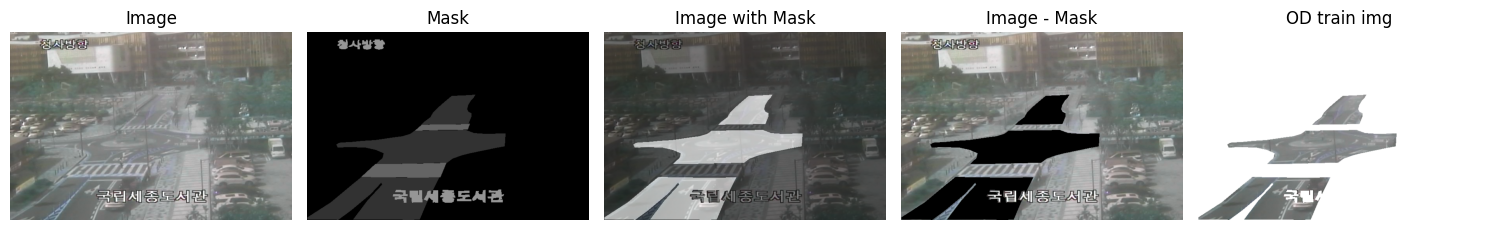

In [29]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
plt.figure(figsize=(15, 5))

# original_img
plt.subplot(1, 5, 1)
plt.imshow(img)  # 0~255(int) (H,W,C)
plt.title("Image")
plt.axis("off")

# mask_img
plt.subplot(1, 5, 2)
plt.imshow(mask*50, cmap="gray")
plt.title("Mask")
plt.axis("off")

# mask on img
mask_colored = np.where(mask == 1, [255, 255, 255], [0, 0, 0]) # 도로 0~255(int) (H,W,C)
# mask_colored = np.where([255, 255, 255], [0, 0, 0]) # 도로

plt.subplot(1, 5, 3)
plt.imshow(img)
plt.imshow(mask_colored, alpha=0.5, cmap="jet")
plt.title("Image with Mask")
plt.axis("off")

# img - mask  # -255~255(int)
plt.subplot(1, 5, 4)

plt.imshow(img - mask_colored)
plt.title("Image - Mask")
plt.axis("off")

plt.subplot(1, 5, 5)

plt.imshow(img - mask_colored + 255)
plt.title("OD train img")
plt.axis("off")

plt.tight_layout()
plt.show()

In [31]:
pwd

'/content'

In [ ]:
'/content/drive/MyDrive/sejong/final/data/segmentation_images/images/*.jpg'

In [70]:
with open('/content/drive/MyDrive/sejong/final/data/new_data/train/labels/15050.txt','r') as f:
  lines = f.readlines()
  print(lines)

['1 0.887500 0.566667 0.022917 0.109259\n', '1 0.924479 0.564815 0.018750 0.109259\n']


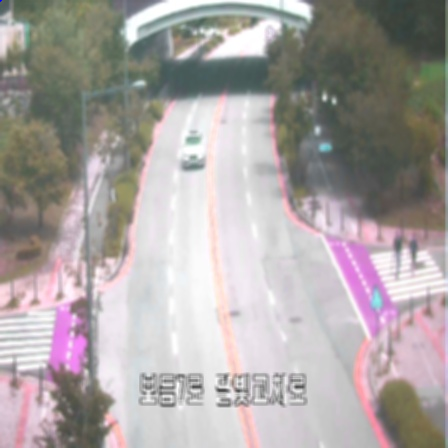

In [73]:
import cv2
from google.colab.patches import cv2_imshow

def draw_bounding_box(image_path, bbox):
    img = cv2.imread(image_path)
    # img = crop(img)
    height, width, _ = img.shape
    x_center, y_center, box_width, box_height = bbox

    x1 = int((x_center - box_width / 2) * width)
    y1 = int((y_center - box_height / 2) * height)
    x2 = int((x_center + box_width / 2) * width)
    y2 = int((y_center + box_height / 2) * height)

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2_imshow(img)

image_path = '/content/drive/MyDrive/sejong/final/data/new_data/train/images/15050.jpg'

# bboxes = [0.012500, 0.767130, 0.023958, 0.139815]
# bboxes = [[0.930832, 0.577330, 0.020891, 0.101750], [0.919671, 0.574532, 0.020318 ,0.099206]]
bboxes = [0,0,0,0]
# for bbox in bboxes:
#   draw_bounding_box(image_path, bbox)

draw_bounding_box(image_path, bboxes)


In [ ]:
# d/